---
# Моделирование технологического процесса концентрирования и извлечения золота из золотосодержащих руд

---


<u>**Цель проекта**</u>: Подготовка прототипа модели машинного обучения для предсказания коэффициентов восстановления золота из золотосодержащих руд.

<u>**Сферы деятельности компаний**</u>: золотодобывающая отрасль

<u>**Навыки и инструменты**</u>: исследовательский анализ данных, кросс-валидация, feature engineering, работа с метриками

## 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import math as m
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 12, 10 #закомментировать в случае возникновения проблем :)
sns.set(rc={'figure.figsize':(14,10)})

In [3]:
import warnings
warnings.simplefilter('ignore')

from tqdm.notebook import tqdm

import time 

import datetime

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder, StandardScaler

from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor

from sklearn.dummy import DummyClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

from sklearn.metrics import (accuracy_score, r2_score, f1_score, mean_squared_error,
                             mean_absolute_error, precision_score, recall_score,
                             precision_recall_curve, confusion_matrix, roc_curve, roc_auc_score, 
                             make_scorer)

import joblib

In [5]:
gold_recovery_train = pd.read_csv(...)
gold_recovery_test = pd.read_csv(...)
gold_recovery_full = pd.read_csv(...)

In [6]:
pd.set_option('display.max_columns', 87)

Взглянем на данные:

In [7]:
print('gold_recovery_train:')
print()
display(gold_recovery_train)
print()
print()
display(gold_recovery_train.describe())
print()
print()
print('Пропуски в gold_recovery_train:')
gold_recovery_train.isna().sum()

gold_recovery_train:



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775



Пропуски в gold_recovery_train:


date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [8]:
print('gold_recovery_test:')
print()
display(gold_recovery_test)
print()
print()
display(gold_recovery_test.describe())
print()
print()
print('Пропуски в gold_recovery_test:')
gold_recovery_test.isna().sum()

gold_recovery_test:



,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7



Пропуски в gold_recovery_test:


date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [9]:
print('gold_recovery_full:')
print()
display(gold_recovery_full)
print()
print()
display(gold_recovery_full.describe())
print()
print()
print('Пропуски в gold_recovery_full:')
gold_recovery_full.isna().sum()


gold_recovery_full:



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,21170.000000,22716.000000,21565.000000,22618.000000,22268.000000,21918.000000,22618.000000,22614.000000,22594.000000,22365.000000,22617.000000,22660.000000,22667.000000,22660.000000,22673.000000,22662.000000,22673.000000,22661.000000,22673.000000,2.267200e+04,2.267200e+04,2.267200e+04,21089.000000,22618.000000,22472.000000,22163.000000,22277.000000,22357.000000,22617.000000,21415.000000,22247.000000,22038.000000,20459.000000,22618.000000,22618.000000,22526.000000,22618.000000,19597.000000,19979.000000,22618.000000,19980.000000,19980.000000,22646.000000,22647.000000,22646.000000,22647.000000,22646.000000,22654.000000,22641.000000,22649.000000,22096.000000,22649.000000,22641.000000,22642.000000,22616.000000,22600.000000,20501.000000,22618.000000,22333.000000,22591.000000,22538.000000,22588.000000,22585.000000,22587.000000,22592.000000,22590.000000,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615



Пропуски в gold_recovery_full:


date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

**Во всех трёх датасетах есть пропуски**.

В тестовой выборке *gold_recovery_test* **отсутствуют 35 признаков** — **целесообразно перед обучением модели оставить в обучающей выборке только те признаки, которые присутствуют в тестовой**.

In [10]:
data_train = pd.DataFrame.copy(gold_recovery_train, deep=True)
data_test = pd.DataFrame.copy(gold_recovery_test, deep=True)
data_full = pd.DataFrame.copy(gold_recovery_full, deep=True)
display(data_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Исключим объекты, пропуски в которых содержатся в целевых признаках:

In [11]:
data_train = (data_train
              [(data_train['rougher.output.recovery'].isna() == False)
               & (data_train['final.output.recovery'].isna() == False)])
data_train[['rougher.output.recovery', 'final.output.recovery']].isnull().sum()

rougher.output.recovery    0
final.output.recovery      0
dtype: int64

**Проверим правильность расчётов** эффективности процесса восстановления золота из золотосодержащей руды, используем метрику **MAE**:

In [12]:
gold_recovery_calculations = pd.DataFrame.copy(
    gold_recovery_train[['rougher.input.feed_au',
                         'rougher.output.concentrate_au',
                         'rougher.output.tail_au',
                         'rougher.output.recovery']],
    deep=True)

gold_recovery_calculations = (gold_recovery_calculations[
    (gold_recovery_calculations['rougher.input.feed_au'].isna() == False)
    & (gold_recovery_calculations['rougher.output.concentrate_au'].isna() == False)
    & (gold_recovery_calculations['rougher.output.tail_au'].isna() == False)
    & (gold_recovery_calculations['rougher.output.recovery'].isna() == False)])

In [13]:
c = gold_recovery_calculations['rougher.output.concentrate_au']
f = gold_recovery_calculations['rougher.input.feed_au']
t = gold_recovery_calculations['rougher.output.tail_au']

gold_recovery_calculations['rougher_recovery_calculated'] = c*(f-t)/(f*(c-t))*100

In [14]:
gold_recovery_calculations[['rougher.output.recovery', 'rougher_recovery_calculated']].sample(30)

,rougher.output.recovery,rougher_recovery_calculated
16089,88.769140,88.769140
15316,85.215327,85.215327
11302,79.970338,79.970338
14979,93.795869,93.795869
13705,92.773525,92.773525
5745,0.000000,-0.000000
2928,83.187821,83.187821
1270,39.374366,39.374366
3288,72.925498,72.925498
9922,72.185637,72.185637


Визуально всё безупречно. Посмотрим на **среднюю абсолютную ошибку**:

In [15]:
rougher_recovery_mae = mean_absolute_error(
    gold_recovery_calculations['rougher_recovery_calculated'],
    gold_recovery_calculations['rougher.output.recovery'])

print('Средняя абсолютная ошибка : {:.15f}%'.format(rougher_recovery_mae))

Средняя абсолютная ошибка : 0.000000000000009%


Расчёты можно назвать идеальными: **MAE не превышает 1•10<sup>-14</sup>**.

Посмотрим, какие признаки недоступны в тестовой выборке:

In [16]:
train_list = gold_recovery_train.columns.tolist()
test_list = gold_recovery_test.columns.tolist()

test_missing_columns_list = list(set(train_list) ^ set(test_list))
sorted(test_missing_columns_list)

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

- Флотация:
  - Параметры продукта:
    - 'rougher.output.concentrate_ag'
    - 'rougher.output.concentrate_au'
    - 'rougher.output.concentrate_pb'
    - 'rougher.output.concentrate_sol'
    - 'rougher.output.recovery'
    - 'rougher.output.tail_ag'
    - 'rougher.output.tail_au'
    - 'rougher.output.tail_pb'
    - 'rougher.output.tail_sol'
  - Расчётные характеристики:
    - 'rougher.calculation.au_pb_ratio'
    - 'rougher.calculation.floatbank10_sulfate_to_au_feed'
    - 'rougher.calculation.floatbank11_sulfate_to_au_feed'
    - 'rougher.calculation.sulfate_to_au_concentrate'
- Первичная очистка:
  - Параметры продукта:
    - 'primary_cleaner.output.concentrate_ag'
    - 'primary_cleaner.output.concentrate_au'
    - 'primary_cleaner.output.concentrate_pb'
    - 'primary_cleaner.output.concentrate_sol'
    - 'primary_cleaner.output.tail_ag'
    - 'primary_cleaner.output.tail_au'
    - 'primary_cleaner.output.tail_pb'
    - 'primary_cleaner.output.tail_sol'
- Вторичная очистка:
  - Параметры продукта:
    - 'secondary_cleaner.output.tail_ag'
    - 'secondary_cleaner.output.tail_au'
    - 'secondary_cleaner.output.tail_pb'
    - 'secondary_cleaner.output.tail_sol'
- Финальные характеристики:
  - Параметры продукта:
    - 'final.output.concentrate_ag'
    - 'final.output.concentrate_au'
    - 'final.output.concentrate_pb'
    - 'final.output.concentrate_sol'
    - 'final.output.recovery'
    - 'final.output.tail_ag'
    - 'final.output.tail_au'
    - 'final.output.tail_pb'
    - 'final.output.tail_sol'

В тестовой выборке отсутствуют параметры продукта на этапах флотации, первичной и вторичной очистки, а также финальные параметры. Отсутствуют и расчётные характеристики для этапа флотации.

Все параметры содержат значения, принадлежащие к типу *float64*.

<div style="border: solid darkcyan 3px; padding: 30px">
    <h3 style="color:black; margin-bottom:25px"> Выводы: </h3>
    <ul>
        <li><b>Изучен технологический процесс добычи золота из золотосодержащих руд</b>;</li>
        <li><b>Загружены и изучены общая, обучающая и тестовая выборки</b>;</li>
        <li><b>Обнаружены пропуски; принято решение исключить объекты с пропусками в целевых признаках</b>;</li>
        <li><b>Проверена правильность расчётов эффективности процесса восстановления золота из золотосодержащей рудыс использованием метрики MAE</b>;</li>
        <li><b>Проанализированы признаки, недоступные в тестовой выборке, определён тип данных</b>.</li>
    </ul>
</div>

## 2. Анализ данных

Посмотрим, как меняется концентрация металлов на различных этапах очистки:

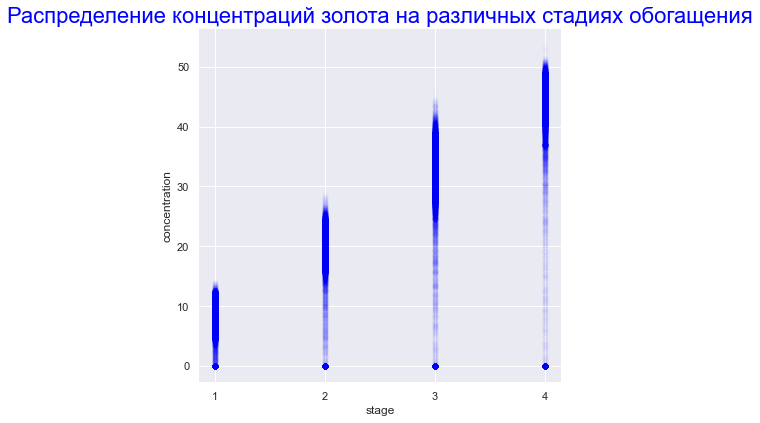

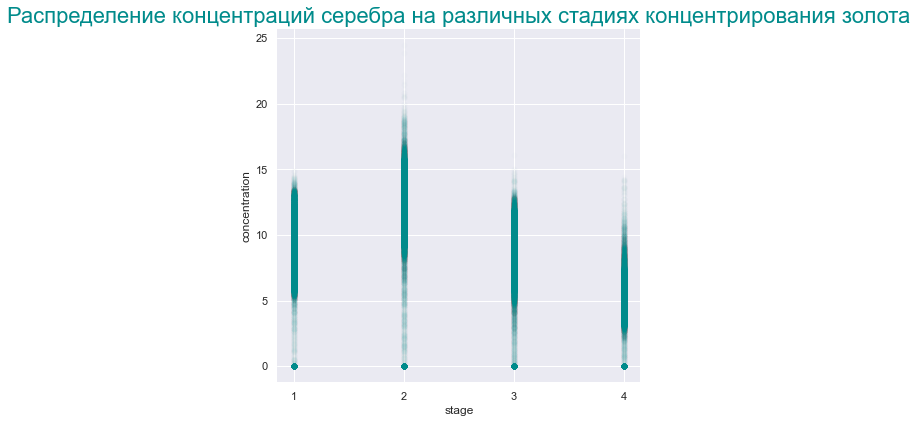

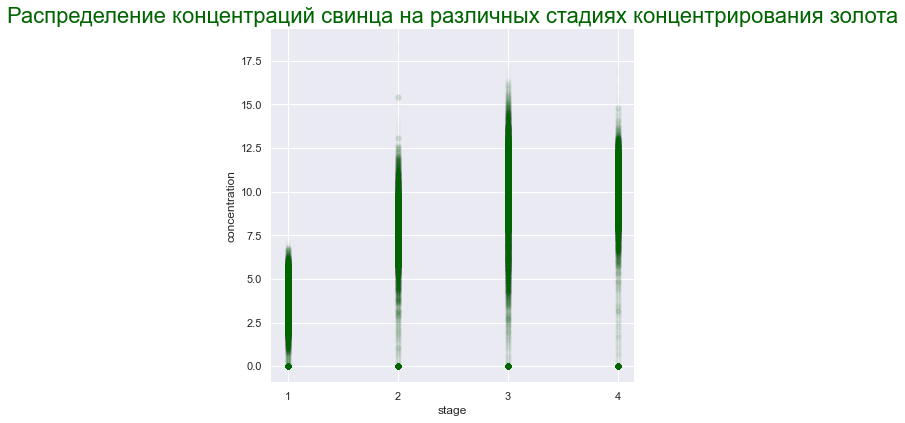

In [17]:
data_concentrations = (pd.DataFrame.copy(gold_recovery_full, deep=True))

data_concentrations_au_plot_1 = data_concentrations[['rougher.input.feed_au']]
data_concentrations_au_plot_1['stage'] = '1'
data_concentrations_au_plot_1.columns = ['concentration', 'stage']

data_concentrations_au_plot_2 = data_concentrations[['rougher.output.concentrate_au']]
data_concentrations_au_plot_2['stage'] = '2'
data_concentrations_au_plot_2.columns = ['concentration', 'stage']

data_concentrations_au_plot_3 = data_concentrations[['primary_cleaner.output.concentrate_au']]
data_concentrations_au_plot_3['stage'] = '3'
data_concentrations_au_plot_3.columns = ['concentration', 'stage']

data_concentrations_au_plot_4 = data_concentrations[['final.output.concentrate_au']]
data_concentrations_au_plot_4['stage'] = '4'
data_concentrations_au_plot_4.columns = ['concentration', 'stage']


data_concentrations_au_plot = (data_concentrations_au_plot_1
                               .append(data_concentrations_au_plot_2)
                               .append(data_concentrations_au_plot_3)
                               .append(data_concentrations_au_plot_4))

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='stage', y='concentration',
                color='blue',
                sizes=(1, 8),
                linewidth=0,
                alpha=0.01,
                data=data_concentrations_au_plot, ax=ax)
plt.title("Распределение концентраций золота на различных стадиях обогащения",
          fontsize=22,
          color='blue')
plt.show()



data_concentrations_ag_plot_1 = data_concentrations[['rougher.input.feed_ag']]
data_concentrations_ag_plot_1['stage'] = '1'
data_concentrations_ag_plot_1.columns = ['concentration', 'stage']

data_concentrations_ag_plot_2 = data_concentrations[['rougher.output.concentrate_ag']]
data_concentrations_ag_plot_2['stage'] = '2'
data_concentrations_ag_plot_2.columns = ['concentration', 'stage']

data_concentrations_ag_plot_3 = data_concentrations[['primary_cleaner.output.concentrate_ag']]
data_concentrations_ag_plot_3['stage'] = '3'
data_concentrations_ag_plot_3.columns = ['concentration', 'stage']

data_concentrations_ag_plot_4 = data_concentrations[['final.output.concentrate_ag']]
data_concentrations_ag_plot_4['stage'] = '4'
data_concentrations_ag_plot_4.columns = ['concentration', 'stage']


data_concentrations_ag_plot = (data_concentrations_ag_plot_1
                               .append(data_concentrations_ag_plot_2)
                               .append(data_concentrations_ag_plot_3)
                               .append(data_concentrations_ag_plot_4))

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='stage', y='concentration',
                color='darkcyan',
                sizes=(1, 8),
                linewidth=0,
                alpha=0.01,
                data=data_concentrations_ag_plot, ax=ax)
plt.title("Распределение концентраций серебра на различных стадиях концентрирования золота",
          fontsize=22,
          color='darkcyan')
plt.show()


data_concentrations_pb_plot_1 = data_concentrations[['rougher.input.feed_pb']]
data_concentrations_pb_plot_1['stage'] = '1'
data_concentrations_pb_plot_1.columns = ['concentration', 'stage']

data_concentrations_pb_plot_2 = data_concentrations[['rougher.output.concentrate_pb']]
data_concentrations_pb_plot_2['stage'] = '2'
data_concentrations_pb_plot_2.columns = ['concentration', 'stage']

data_concentrations_pb_plot_3 = data_concentrations[['primary_cleaner.output.concentrate_pb']]
data_concentrations_pb_plot_3['stage'] = '3'
data_concentrations_pb_plot_3.columns = ['concentration', 'stage']

data_concentrations_pb_plot_4 = data_concentrations[['final.output.concentrate_pb']]
data_concentrations_pb_plot_4['stage'] = '4'
data_concentrations_pb_plot_4.columns = ['concentration', 'stage']


data_concentrations_pb_plot = (data_concentrations_pb_plot_1
                               .append(data_concentrations_pb_plot_2)
                               .append(data_concentrations_pb_plot_3)
                               .append(data_concentrations_pb_plot_4))

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='stage', y='concentration',
                color='darkgreen',
                sizes=(1, 8),
                linewidth=0,
                alpha=0.01,
                data=data_concentrations_pb_plot, ax=ax)
plt.title("Распределение концентраций свинца на различных стадиях концентрирования золота",
          fontsize=22,
          color='darkgreen')
plt.show()

Как и ожидалось, по диаграммам рассеивания видно, что концентрации золота на каждой стадии увеличиваются почти линейно. Похожая картина наблюдается и в случае со свинцом вплоть до стадии вторичной очистки, после которой концентрация падает. Серебро концентрируется до стадии первичной очистки, а затем его концентрация также уменьшается.

In [18]:
data_train[['rougher.input.feed_size',
            'primary_cleaner.input.feed_size',
            'rougher.output.recovery',
            'final.output.recovery']].describe()

,rougher.input.feed_size,primary_cleaner.input.feed_size,rougher.output.recovery,final.output.recovery
count,14005.000000,14149.000000,14149.000000,14149.000000
mean,60.110518,7.322310,82.704502,66.518832
std,22.418485,0.614062,14.479156,10.295402
min,9.659576,1.080000,0.000000,0.000000
25%,48.973027,6.960000,79.993067,62.545817
50%,55.373885,7.290000,85.299462,67.432775
75%,66.080172,7.700000,90.165021,72.346428
max,484.967466,10.470000,100.000000,100.000000


В процессе извлечения золота из золотоносных руд размер частиц на входе чрезвычайно важен, причём чем меньше частицы, тем лучше.

**Исключим объекты, для которых значения размеров частиц на входе превышает значение девяностопятипроцентного квантиля**:

In [19]:
data_train = (data_train
              [data_train['rougher.input.feed_size'] <= data_train['rougher.input.feed_size']
               .quantile(0.95)])
data_test = (data_test
              [data_test['rougher.input.feed_size'] <= data_test['rougher.input.feed_size']
               .quantile(0.95)])

**Сравним распределения размеров гранул сырья на обучающей и тестовой выборках**:

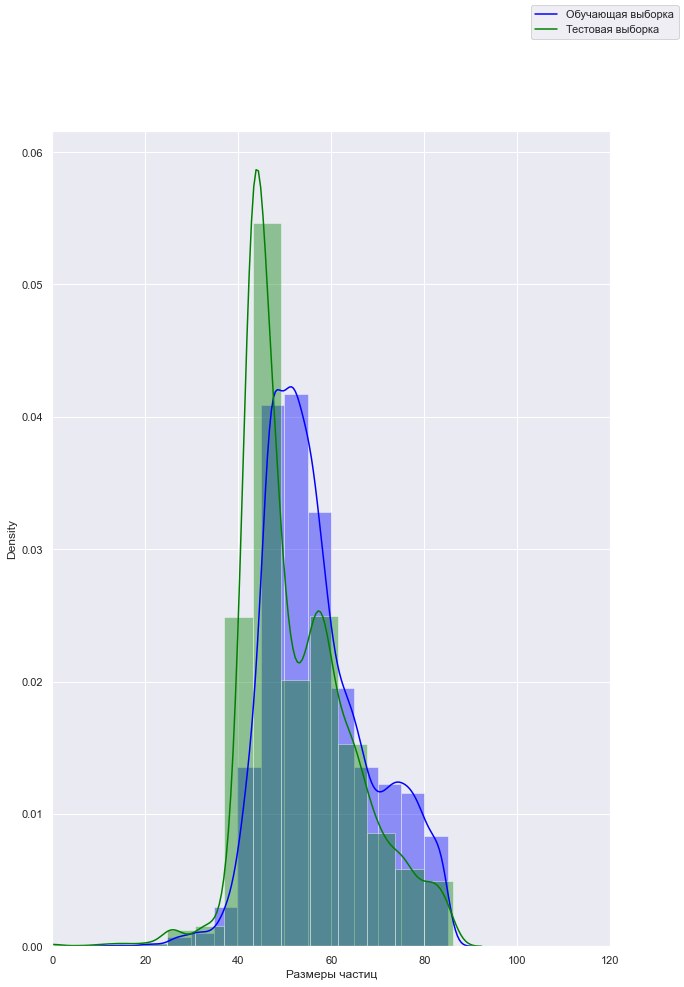

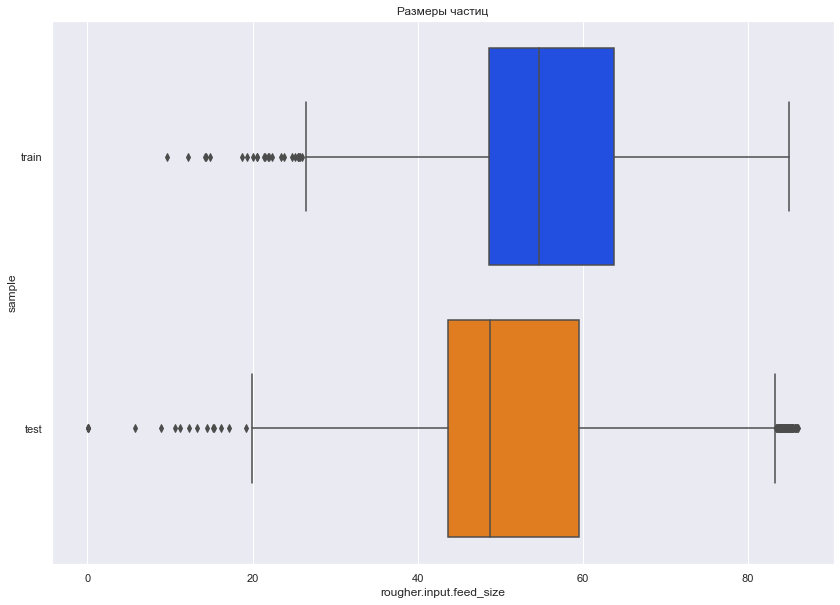

In [20]:
fig = plt.figure(figsize=(10,15))
sns.distplot(data_train['rougher.input.feed_size'],
             bins=np.int64(np.ceil(1 + m.log2(len(data_train)))),
             kde=True,
             color="blue",
             norm_hist=True,
             axlabel='Размеры частиц').set_xlim(0,150)

sns.distplot(data_test['rougher.input.feed_size'],
             bins=np.int64(np.ceil(1 + m.log2(len(data_test)))),
             kde=True,
             color="green",
             norm_hist=True,
             axlabel='Размеры частиц').set_xlim(0,120)
fig.legend(labels=['Обучающая выборка','Тестовая выборка'])
plt.show()


data_train_r = pd.DataFrame.copy(data_train, deep=True)
data_train_r['sample'] = 'train'

data_test_r = pd.DataFrame.copy(data_test, deep=True)
data_test_r['sample'] = 'test'

data_merged = (pd.DataFrame.copy(data_train_r)
               .append(data_test_r))

(sns.boxplot(y='sample',
             x='rougher.input.feed_size',
             data=data_merged,
             orient="h",
             palette="bright")
 .set_title('Размеры частиц'))

plt.show()

По гистограмме можно сделать вывод о том, что **обучающая и тестовая выборки скошены в разные стороны**, однако этот факт **не окажет существенного влияния на качество обученных моделей**.

"Ящики с усами" подтверждает наше предположение — **медианы выборок близки по значению**.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах:

In [21]:
data_full.columns.tolist()

['date',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.s

,rougher_sum,primary_cleaner_sum,final_sum
count,13282.000000,13024.000000,12994.000000
mean,93.099504,91.536704,94.316966
std,12.864904,12.742539,8.824807
min,19.129793,0.000000,1.976540
25%,90.147430,86.352408,91.491864
50%,95.036346,92.554561,94.980411
75%,99.730313,98.945588,98.652081
max,159.920238,119.187233,111.926638


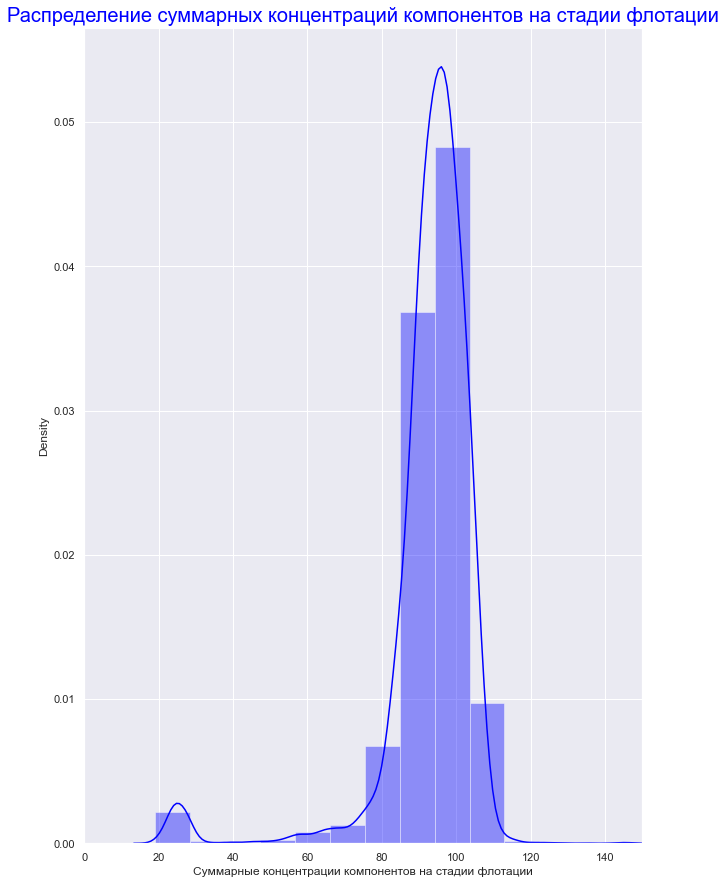

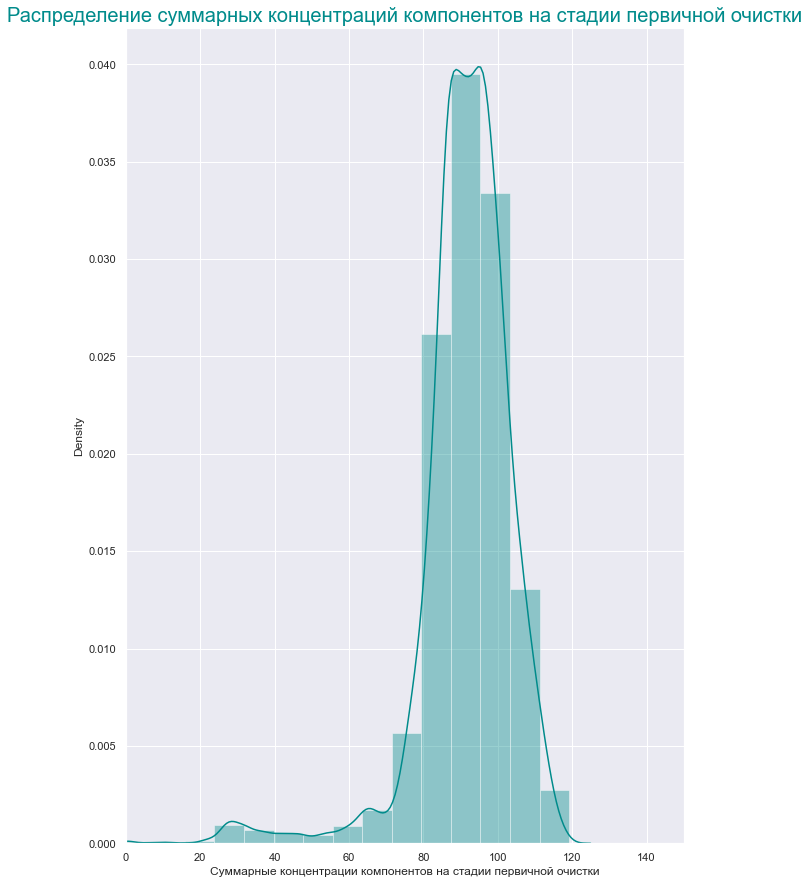

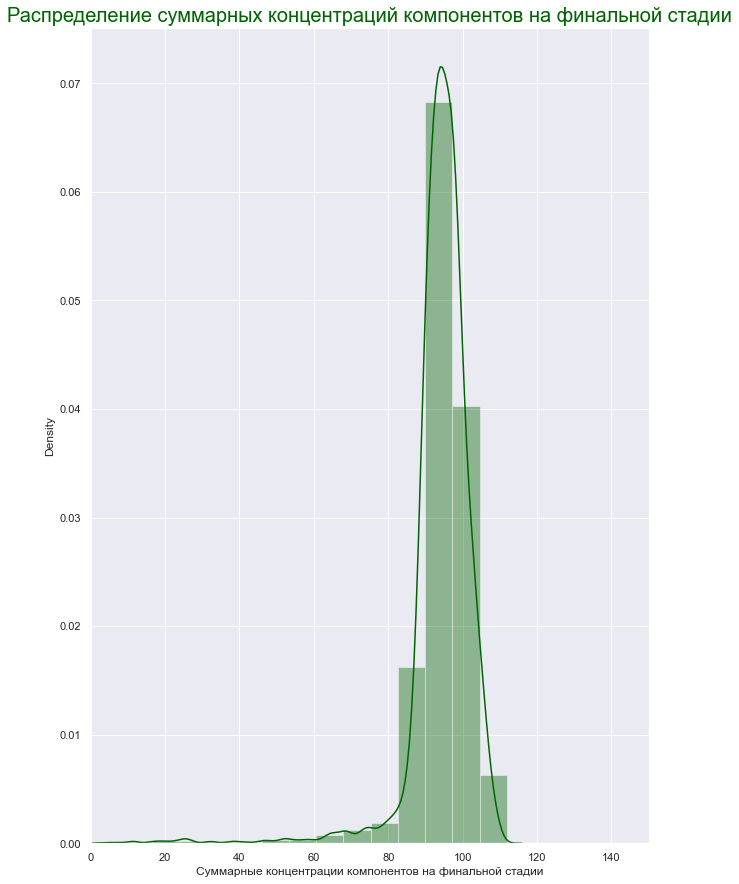

In [22]:
data_train['rougher_sum'] = (data_train['rougher.output.concentrate_ag']
                             + data_train['rougher.output.concentrate_pb']
                             + data_train['rougher.output.concentrate_sol']
                             + data_train['rougher.output.concentrate_au']
                             
                             + data_train['rougher.output.tail_ag']
                             + data_train['rougher.output.tail_pb']
                             + data_train['rougher.output.tail_sol']
                             + data_train['rougher.output.tail_au'])

data_train['primary_cleaner_sum'] = (data_train['primary_cleaner.output.concentrate_ag']
                                    + data_train['primary_cleaner.output.concentrate_pb']
                                    + data_train['primary_cleaner.output.concentrate_sol']
                                    + data_train['primary_cleaner.output.concentrate_au']
                                     
                                    + data_train['primary_cleaner.output.tail_ag']
                                    + data_train['primary_cleaner.output.tail_pb']
                                    + data_train['primary_cleaner.output.tail_sol']
                                    + data_train['primary_cleaner.output.tail_au'])

data_train['final_sum'] = (data_train['final.output.concentrate_ag']
                           + data_train['final.output.concentrate_pb']
                           + data_train['final.output.concentrate_sol']
                           + data_train['final.output.concentrate_au']
                           
                           + data_train['final.output.tail_ag']
                           + data_train['final.output.tail_pb']
                           + data_train['final.output.tail_sol']
                           + data_train['final.output.tail_au'])

 
display(data_train[['rougher_sum', 'primary_cleaner_sum', 'final_sum']].describe())


fig = plt.figure(figsize=(10,15))
plt.title("Распределение суммарных концентраций компонентов на стадии флотации",
          fontsize=20,
          color='blue')
sns.distplot(data_train['rougher_sum'],
             bins=np.int64(np.ceil(1 + m.log2(len(data_train)))),
             kde=True,
             color="blue",
             norm_hist=True,
             axlabel='Суммарные концентрации компонентов на стадии флотации').set_xlim(0,150)
plt.show()




fig = plt.figure(figsize=(10,15))
plt.title("Распределение суммарных концентраций компонентов на стадии первичной очистки",
          fontsize=20,
          color='darkcyan')
sns.distplot(data_train['primary_cleaner_sum'],
             bins=np.int64(np.ceil(1 + m.log2(len(data_train)))),
             kde=True,
             color="darkcyan",
             norm_hist=True,
             axlabel='Суммарные концентрации компонентов на стадии первичной очистки').set_xlim(0,150)
plt.show()

fig = plt.figure(figsize=(10,15))
plt.title("Распределение суммарных концентраций компонентов на финальной стадии",
          fontsize=20,
          color='darkgreen')
sns.distplot(data_train['final_sum'],
             bins=np.int64(np.ceil(1 + m.log2(len(data_train)))),
             kde=True,
             color="darkgreen",
             norm_hist=True,
             axlabel='Суммарные концентрации компонентов на финальной стадии').set_xlim(0,150)
plt.show()

По распределениям суммарных концентрация видно, что в данных есть ошибки, полученные, вероятно, в результате неправильной работы измерительного оборудования.

Перед обучением модели имеет смысл убрать из выборки суммы, превышающие 100%. Суммарные концентрации меньше 50% также желательно исключить.

In [23]:
data_train_1 = pd.DataFrame.copy(
    data_train.query('rougher_sum != 0 and primary_cleaner_sum != 0 and final_sum != 0'),
    deep=True)

<div style="border: solid darkcyan 3px; padding: 30px">
    <h3 style="color:black; margin-bottom:25px"> Выводы: </h3>
    <ul>
        <li><b>Изучены распределения концентраций металлов на различных этапах очистки</b>;</li>
        <li><b>Проанализированы размеры частиц. Исключены объекты, содержащие выбросы.</b>;</li>
        <li><b>Проведён сравнительный анализ распределений размеров гранул сырья на обучающей и тестовой выборках; влияние скошенностей выборок на эффективность обучения моделей незначительно</b>;</li>
        <li><b>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</b>;</li>
        <li><b>Найдены аномальные суммарные концентрации; наиболее вероятная причина — сбой в работе измерительного оборудования</b>;</li>
        <li><b>В целях повышения качества обучения моделей аномальные объекты были исключены</b>.</li>
    </ul>
</div>

## 3. Модель

Введём функции расчта метрик sMAPE:

<img src=https://pictures.s3.yandex.net/resources/smape_1576239058.jpg>

In [24]:
def smape_score(target, predictions):
    smape = (100 * np.sum(2 * np.abs(predictions - target)
                          / (np.abs(target) + np.abs(predictions)))
             /len(target))
    return smape

<img src=https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg>

In [25]:
def smape_final_score(smape_rougher, smape_final):
    smape_final = 0.25 * smape_rougher + 0.75 * smape_final
    return smape_final

Выделим в каждой выборке **целевые признаки**. Так как целевых признака два, лучший результат покажет стратегия **параллельного обучения моделей с использованием разных целевых признаков**.

Признак, содержащий дату и время, будет сильно дизориентировать модель. От него следует избавиться.

Перед обучением признаки желательно **масштабировать**, прибегнув к **стандартизации**:

In [26]:
test_columns = gold_recovery_test.columns.tolist()
test_columns.append('rougher.output.recovery')
test_columns.append('final.output.recovery')

data_train_1.dropna(inplace=True)
target_train_rougher = pd.DataFrame(data_train_1['rougher.output.recovery'])
target_train_final = pd.DataFrame(data_train_1['final.output.recovery'])

features_train = (data_train_1[test_columns]
                  .drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
                  .drop('date', axis=1))

scaler = StandardScaler().fit(features_train)
features_train = pd.DataFrame(scaler.transform(features_train))

В тестовой выборке отсутствуют целевые признаки. Восполним их из общей выборки:

In [27]:
data_test_1 = pd.DataFrame.copy(data_test, deep=True)

data_test_2 = (data_test_1.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']],
                  on='date',
                  how='left').dropna().reset_index(drop=True))

features_test = (data_test_2
                 .drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
                 .drop('date', axis=1))

features_test = pd.DataFrame(scaler.transform(features_test))

target_test_rougher = pd.DataFrame(data_test_2['rougher.output.recovery'])
target_test_final = pd.DataFrame(data_test_2['final.output.recovery'])


Введём функцию для кросс-валидации:

In [28]:
def cv_score(model, parameters, features_train, target_train, n_splits):
    cv = KFold(n_splits=n_splits, random_state=12345)
    
    scores = []
    try:
        for features_train_fold_index, features_valid_fold_index in cv.split(
            features_train, target_train):

            features_train_fold = features_train.iloc[features_train_fold_index]
            target_train_fold = target_train.iloc[features_train_fold_index]

            features_valid_fold = features_train.iloc[features_valid_fold_index]
            target_valid_fold = target_train.iloc[features_valid_fold_index]

            model_obj = model(**parameters).fit(features_train_fold,
                                                    target_train_fold)
            predictions = model_obj.predict(features_valid_fold) 
            predictions = predictions.reshape(len(predictions),1)
            score = smape_score(target_valid_fold, predictions)
            scores.append(score)

    except:
        print("Что-то пошло не так...")
        
    return np.array(scores)
        

Обучим **дерево решений**, выполнив поиск оптимальных гиперпараметров методом полного перебора в заданном диапазоне. Будем применять кросс-валидацию и смотреть на значения метрики sMAPE. Гиперпараметры, дающие минимальное значение метрики, сохраним в отдельный словарь. Начнём с выходов после флотации:

In [29]:
start = time.time()

#Создадим переменную, в которую сохраним гипотетически недостижимое значение sMAPE.
#В дальнейшем здесь появится лучшее (минимальное) значение этой метрики.
smape_min_dtr_r = 1000

#В каждом случае будем создавать список, в который будем скидывать гиперпараметры и текущие значения метрик.
scores_list_dtr_r = []

#for max_depth in tqdm(range(1, 21)):
for max_depth in tqdm(range(3, 4)):        
        
        
        dtr_parameters = {'random_state' : 12345,
                          'max_depth': max_depth}
        
        dtr = DecisionTreeRegressor
        
#В функцию кросс-валидации уже "вшита" метрика sMAPE.
        current_score = (cv_score(model=dtr,
                                  parameters=dtr_parameters,
                                  features_train=features_train,
                                  target_train=target_train_rougher,
                                  n_splits=3)
                         .mean())
        
        print('Гиперпараметры: max_depth={}, sMAPE: {:.4f}'
              .format(max_depth, current_score))

        scores_list_dtr_r.append([max_depth, current_score])
        
        if current_score < smape_min_dtr_r:
            smape_min_dtr_r = current_score
            best_parameters_dtr_r = {'random_state' : 12345,
                                   'max_depth': max_depth}
            

scores_df_dtr_r = pd.DataFrame(data=scores_list_dtr_r, columns=['max_depth', 'smape'])
end = time.time()
time_elapsed = end - start

print()
print()
print()

print('Лучшее значение метрики: ', smape_min_dtr_r)
print('Затраченное время: {} часов {} минут {} секунд'
      .format(datetime.datetime.fromtimestamp(time_elapsed).hour,
              datetime.datetime.fromtimestamp(time_elapsed).minute,
              datetime.datetime.fromtimestamp(time_elapsed).second))

Гиперпараметры: max_depth=3, sMAPE: 11.8317




Лучшее значение метрики:  11.831653010023752
Затраченное время: 3 часов 0 минут 0 секунд


Ту же самую операцию проделаем и с финальными выходами:

In [30]:
start = time.time()

smape_min_dtr_f = 1000
scores_list_dtr_f = []

#for max_depth in tqdm(range(1, 21)):
for max_depth in tqdm(range(1, 2)):
        
        
        dtr_parameters = {'random_state' : 12345,
                          'max_depth': max_depth}

        current_score = (cv_score(model=dtr,
                                  parameters=dtr_parameters,
                                  features_train=features_train,
                                  target_train=target_train_final,
                                  n_splits=3)
                         .mean())
        
        print('Гиперпараметры: max_depth={}, sMAPE: {:.4f}'
              .format(max_depth, current_score))

        scores_list_dtr_f.append([max_depth, current_score])
        
        if current_score < smape_min_dtr_f:
            smape_min_dtr_f = current_score
            best_parameters_dtr_f = {'random_state' : 12345,
                                   'max_depth': max_depth}
            

scores_df_dtr_f = pd.DataFrame(data=scores_list_dtr_f, columns=['max_depth', 'smape'])
end = time.time()
time_elapsed = end - start

print()
print()
print()

print('Лучшее значение метрики: ', smape_min_dtr_f)
print('Затраченное время: {} часов {} минут {} секунд'
      .format(datetime.datetime.fromtimestamp(time_elapsed).hour,
              datetime.datetime.fromtimestamp(time_elapsed).minute,
              datetime.datetime.fromtimestamp(time_elapsed).second))

Гиперпараметры: max_depth=1, sMAPE: 8.8027




Лучшее значение метрики:  8.802650340711503
Затраченное время: 3 часов 0 минут 0 секунд


Далее обучим модель **случайного леса**:

In [31]:
start = time.time()

smape_min_rfr_r = 1000
scores_list_rfr_r = []

#for max_depth in tqdm(range(1, 21, 4)):
#    for n_estimators in tqdm(range(1, 301, 100)):
for max_depth in tqdm(range(5, 6)):
    for n_estimators in tqdm(range(201, 202)):
        
        
        rfr_parameters = {'random_state' : 12345,
                          'max_depth': max_depth,
                          'n_estimators' : n_estimators,
                          'n_jobs' : 6}
        
        rfr = RandomForestRegressor
        

        current_score = (cv_score(model=rfr,
                                  parameters=rfr_parameters,
                                  features_train=features_train,
                                  target_train=target_train_rougher,
                                  n_splits=3)
                         .mean())
        
        print('Гиперпараметры: max_depth={}, n_estimators={} sMAPE: {:.4f}'
              .format(max_depth, n_estimators, current_score))

        scores_list_rfr_r.append([max_depth, n_estimators, current_score])
        
        if current_score < smape_min_rfr_r:
            smape_min_rfr_r = current_score
            best_parameters_rfr_r = {'random_state' : 12345,
                                     'max_depth': max_depth,
                                     'n_estimators' : n_estimators}
            

scores_df_rfr_r = pd.DataFrame(data=scores_list_rfr_r, columns=['max_depth', 'n_estimators', 'smape'])
end = time.time()
time_elapsed = end - start

print()
print()
print()

print('Лучшее значение метрики: ', smape_min_rfr_r)
print('Затраченное время: {} часов {} минут {} секунд'
      .format(datetime.datetime.fromtimestamp(time_elapsed).hour,
              datetime.datetime.fromtimestamp(time_elapsed).minute,
              datetime.datetime.fromtimestamp(time_elapsed).second))

Гиперпараметры: max_depth=5, n_estimators=201 sMAPE: 11.2889





Лучшее значение метрики:  11.288872615682827
Затраченное время: 3 часов 0 минут 9 секунд


In [32]:
start = time.time()

smape_min_rfr_f = 1000
scores_list_rfr_f = []

#for max_depth in tqdm(range(1, 21, 4)):
#    for n_estimators in tqdm(range(1, 301, 100)):
for max_depth in tqdm(range(1, 2)):
    for n_estimators in tqdm(range(1, 2)):
        
        
        rfr_parameters = {'random_state' : 12345,
                          'max_depth': max_depth,
                          'n_estimators' : n_estimators,
                          'n_jobs' : 6}

        current_score = (cv_score(model=rfr,
                                  parameters=rfr_parameters,
                                  features_train=features_train,
                                  target_train=target_train_final,
                                  n_splits=3)
                         .mean())
        
        print('Гиперпараметры: max_depth={}, n_estimators={} sMAPE: {:.4f}'
              .format(max_depth, n_estimators, current_score))

        scores_list_rfr_f.append([max_depth, n_estimators, current_score])
        
        if current_score < smape_min_rfr_f:
            smape_min_rfr_f = current_score
            best_parameters_rfr_f = {'random_state' : 12345,
                                     'max_depth': max_depth,
                                     'n_estimators' : n_estimators}
            

scores_df_rfr_f = pd.DataFrame(data=scores_list_rfr_f, columns=['max_depth', 'n_estimators', 'smape'])
end = time.time()
time_elapsed = end - start

print()
print()
print()

print('Лучшее значение метрики: ', smape_min_rfr_f)
print('Затраченное время: {} часов {} минут {} секунд'
      .format(datetime.datetime.fromtimestamp(time_elapsed).hour,
              datetime.datetime.fromtimestamp(time_elapsed).minute,
              datetime.datetime.fromtimestamp(time_elapsed).second))

Гиперпараметры: max_depth=1, n_estimators=1 sMAPE: 8.7558





Лучшее значение метрики:  8.75578566403531
Затраченное время: 3 часов 0 минут 0 секунд


В качестве третьей модели выберем **градиентный бустинг**:

In [33]:
start = time.time()

smape_min_gbr_r = 1000
scores_list_gbr_r = []

#for max_depth in tqdm(range(1, 21, 4)):
#    for n_estimators in tqdm(range(1, 301, 100)):
for max_depth in tqdm(range(1, 2)):
    for n_estimators in tqdm(range(101, 102)):
        
        
        gbr_parameters = {'random_state' : 12345,
                          'max_depth': max_depth,
                          'n_estimators' : n_estimators}
        
        gbr = GradientBoostingRegressor
        

        current_score = (cv_score(model=gbr,
                                  parameters=gbr_parameters,
                                  features_train=features_train,
                                  target_train=target_train_rougher,
                                  n_splits=3)
                         .mean())
        
        print('Гиперпараметры: max_depth={}, n_estimators={}, sMAPE: {:.4f}'
              .format(max_depth, n_estimators, current_score))

        scores_list_gbr_r.append([max_depth, n_estimators, current_score])
        
        if current_score < smape_min_gbr_r:
            smape_min_gbr_r = current_score
            best_parameters_gbr_r = {'random_state' : 12345,
                                     'max_depth': max_depth,
                                     'n_estimators' : n_estimators}
            

scores_df_gbr_r = pd.DataFrame(data=scores_list_gbr_r, columns=['max_depth', 'n_estimators', 'smape'])
end = time.time()
time_elapsed = end - start

print()
print()
print()

print('Лучшее значение метрики: ', smape_min_gbr_r)
print('Затраченное время: {} часов {} минут {} секунд'
      .format(datetime.datetime.fromtimestamp(time_elapsed).hour,
              datetime.datetime.fromtimestamp(time_elapsed).minute,
              datetime.datetime.fromtimestamp(time_elapsed).second))


Гиперпараметры: max_depth=1, n_estimators=101, sMAPE: 11.6097





Лучшее значение метрики:  11.609682560059307
Затраченное время: 3 часов 0 минут 8 секунд


In [34]:
start = time.time()

smape_min_gbr_f = 1000
scores_list_gbr_f = []

#for max_depth in tqdm(range(1, 21, 4)):
#    for n_estimators in tqdm(range(1, 301, 100)):
for max_depth in tqdm(range(1, 2)):
    for n_estimators in tqdm(range(101, 102)):
        
        
        gbr_parameters = {'random_state' : 12345,
                          'max_depth': max_depth,
                          'n_estimators' : n_estimators}
        
        current_score = (cv_score(model=gbr,
                                  parameters=gbr_parameters,
                                  features_train=features_train,
                                  target_train=target_train_rougher,
                                  n_splits=3)
                         .mean())
        
        print('Гиперпараметры: max_depth={}, n_estimators={}, sMAPE: {:.4f}'
              .format(max_depth, n_estimators, current_score))

        scores_list_gbr_f.append([max_depth, n_estimators, current_score])
        
        if current_score < smape_min_gbr_f:
            smape_min_gbr_f = current_score
            best_parameters_gbr_f = {'random_state' : 12345,
                                     'max_depth': max_depth,
                                     'n_estimators' : n_estimators}
            

scores_df_gbr_f = pd.DataFrame(data=scores_list_gbr_f, columns=['max_depth', 'n_estimators', 'smape'])
end = time.time()
time_elapsed = end - start

print()
print()
print()

print('Лучшее значение метрики: ', smape_min_gbr_f)
print('Затраченное время: {} часов {} минут {} секунд'
      .format(datetime.datetime.fromtimestamp(time_elapsed).hour,
              datetime.datetime.fromtimestamp(time_elapsed).minute,
              datetime.datetime.fromtimestamp(time_elapsed).second))


Гиперпараметры: max_depth=1, n_estimators=101, sMAPE: 11.6097





Лучшее значение метрики:  11.609682560059307
Затраченное время: 3 часов 0 минут 8 секунд


Оценим значения итогового sMAPE для каждой из обученных моделей, добавим их в отдельный DataFrame:

In [35]:
results = [['DecisionTreeRegressor', smape_final_score(smape_min_dtr_r, smape_min_dtr_f)],
               ['RandonForestRegressor', smape_final_score(smape_min_rfr_r, smape_min_rfr_f)],
               ['GradientBoostRegressor', smape_final_score(smape_min_gbr_r, smape_min_gbr_f)]]
data_results = pd.DataFrame(data=results, columns=['model', 'final_smape_score'])
data_results

,model,final_smape_score
0,DecisionTreeRegressor,9.559901
1,RandonForestRegressor,9.389057
2,GradientBoostRegressor,11.609683


В качестве финальной модели выберем ***GradientBoostingRegressor***:

In [36]:
predictions_final_r = (gbr(**best_parameters_gbr_r)
                 .fit(features_train, target_train_rougher)
                 .predict(features_test)
                )

predictions_final_r = predictions_final_r.reshape(len(predictions_final_r), 1)

predictions_final_f = (gbr(**best_parameters_gbr_f)
                 .fit(features_train, target_train_final)
                 .predict(features_test)
                )
predictions_final_f = predictions_final_f.reshape(len(predictions_final_f), 1)

**Вычислим метрику sMAPE для этапов флотации и финальной обработки**:

In [37]:
smape_score_final_r = np.float64(smape_score(predictions_final_r, target_test_rougher))
smape_score_final_r

9.462699021892961

In [38]:
smape_score_final_f = np.float64(smape_score(predictions_final_f, target_test_final))
smape_score_final_f

8.479883503684139

**Произведём оценку итогового sMAPE**:

In [39]:
smape_score_final = smape_final_score(smape_score_final_r, smape_score_final_f)
smape_score_final

8.725587383236345

Сравним обученную финальную модель с фиктивной, всегда выдающей в качестве предсказанных объектов медианные значения. Для этого создадим специальные переменные и напишем специальную функцию для вычисления фиктивного значения sMAPE-метрик:

In [40]:
def dummy_smape_score(target, predictions):
    smape = (100 * np.sum(2 * np.abs(predictions - target)
                          / (np.abs(target) + np.abs(predictions)))/len(target_test_final))
    return smape

In [41]:
predictions_final_dummy_r = np.float64(pd.DataFrame(predictions_final_r).median())
predictions_final_dummy_f = np.float64(pd.DataFrame(predictions_final_f).median())


smape_score_final_dummy_r = np.float64(dummy_smape_score(predictions_final_dummy_r, target_test_rougher))
smape_score_final_dummy_f = np.float64(dummy_smape_score(predictions_final_dummy_f, target_test_final))
smape_final_score_dummy = smape_final_score(smape_score_final_dummy_r, smape_score_final_dummy_f)
smape_final_score_dummy

8.800779160503026

In [42]:
print('Обученная модель эффективнее константной на {:.4f}%.'
      .format((1-smape_score_final/smape_final_score_dummy)*100))

Обученная модель эффективнее константной на 0.8544%.


<div style="border: solid darkcyan 3px; padding: 30px">
    <h3 style="color:black; margin-bottom:25px"> Выводы: </h3>
    <ul>
        <li><b>Введены функции</b>:</li>
        <ul>
            <li><b>Вычисления метрики sMAPE для стадий флотации и финальной обработки</b>;</li>
            <li><b>Вычисления метрики итогового sMAPE</b>;</li>
            <li><b>Кросс-валидации с использованием метрики sMAPE</b>;</li>
        </ul>
        <li><b>В тестовую выборку добавлены целевые признаки из общего датасета</b>;</li>
        <li><b>От обучающей и тестовой выборок отделены целевые признаки и сохранены в отдельных переменных</b>;</li>
        <li><b>Убраны признаки, мешающие обучению</b>;</li>
        <li><b>"Полезные" признаки масштабированы методом стандартизации</b>;</li>
        <li><b>Обучены модели</b>:</li>
        <ul>
            <li><b>DecisionTreeRegressor</b>;</li>
            <li><b>RandomForestRegressor</b>;</li>
            <li><b>GradientBoostingRegressor</b>;</li>
        </ul>
        <li><b>Получена итоговая оценка sMAPE для каждой модели, найдены оптимальные наборы гиперпараметров</b>;</li>
        <li><b>В качестве финальной выбрана модель GradientBoostingRegressor</b>;</li>
        <li><b>Эффективность обученной модели доказана сравнением с константной моделью по метрике sMAPE</b>.</li>
    </ul>
</div>